In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/richi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/richi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/richi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**Ejercicios de análisis de sentimiento y textos.**

### Objetivos 
* Realizar minería de textos. 
* Interpretación de los textos
* Análisis de los resultados.

# Ejercicio 1

Agarre un texto en inglés que quiera, y calcule la frecuencia de sus palabras.


# Solución

1. Leer texto del file.txt

In [92]:
text_file=open('file.txt','r',encoding="utf-8")
text=text_file.read()
print(text)

Devouring Time, blunt thou the lion's paws,
And make the earth devour her own sweet brood;
Pluck the keen teeth from the fierce tiger's jaws,
And burn the long-lived phoenix in her blood;
Make glad and sorry seasons as thou fleet'st,
And do whate'er thou wilt, swift-footed Time,
To the wide world and all her fading sweets;
But I forbid thee one most heinous crime:
O! carve not with thy hours my love's fair brow,
Nor draw no lines there with thine antique pen;
Him in thy course untainted do allow
For beauty's pattern to succeeding men.
Yet, do thy worst old Time: despite thy wrong,
My love shall in my verse ever live young.



2. Sustituir las nuevas líneas por espacios:

In [93]:
text=text.replace('\n'," ")

3. Analizar frecuencia de palabras.

In [94]:
freq = Counter(text.split()).most_common()
#freq = Counter(text.split())
print(freq)

[('the', 6), ('thy', 4), ('thou', 3), ('And', 3), ('her', 3), ('in', 3), ('do', 3), ('Time,', 2), ('and', 2), ('with', 2), ('my', 2), ('Devouring', 1), ('blunt', 1), ("lion's", 1), ('paws,', 1), ('make', 1), ('earth', 1), ('devour', 1), ('own', 1), ('sweet', 1), ('brood;', 1), ('Pluck', 1), ('keen', 1), ('teeth', 1), ('from', 1), ('fierce', 1), ("tiger's", 1), ('jaws,', 1), ('burn', 1), ('long-lived', 1), ('phoenix', 1), ('blood;', 1), ('Make', 1), ('glad', 1), ('sorry', 1), ('seasons', 1), ('as', 1), ("fleet'st,", 1), ("whate'er", 1), ('wilt,', 1), ('swift-footed', 1), ('To', 1), ('wide', 1), ('world', 1), ('all', 1), ('fading', 1), ('sweets;', 1), ('But', 1), ('I', 1), ('forbid', 1), ('thee', 1), ('one', 1), ('most', 1), ('heinous', 1), ('crime:', 1), ('O!', 1), ('carve', 1), ('not', 1), ('hours', 1), ("love's", 1), ('fair', 1), ('brow,', 1), ('Nor', 1), ('draw', 1), ('no', 1), ('lines', 1), ('there', 1), ('thine', 1), ('antique', 1), ('pen;', 1), ('Him', 1), ('course', 1), ('untaint

2. Graficar las 30  palabras con más frecuencia.

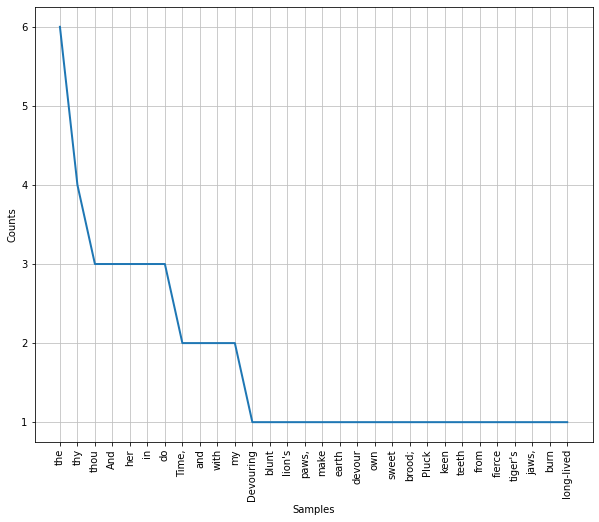

In [115]:
fdistribution = nltk.FreqDist(text.split())
f=plt.figure(figsize=(10,8))
fdistribution.plot(30)
plt.show()

# Ejercicio 2

Extraiga las **stopwords** y realice **stemming** en su conjunto de datos.

## 2.1  Eliminación de palabras vacías (stopwords)

Cuando trabajamos con palabras, sobre todo si tenemos en cuenta su semántica, a veces necesitamos excluir algunas palabras muy frecuentes que no aportan ningún significado sustancial a una frase, palabras como pero, podemos, nosotros, etc. Esta técnica explica cómo hacerlo.

# Solución

1. Introduzca la lista de palabras vacías de NLTK:

In [96]:
stoplist = stopwords.words('english')
print(len(stoplist))
list(stoplist)[:10]

179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### Información

Esta es la lista de idiomas que NLTK admite para las palabras vacías: Arabic, Azerbaijani, Danish, Dutch, English, Finnish, French, German, Greek, Hungarian, Italian, Kazakh, Nepali, Norwegian, Portuguese, Romanian, Russian, Spanish, Swedish, y Turkish.

2. Dividir el texto en palabras - tokenización

In [97]:
words = nltk.tokenize.word_tokenize(text)

3. Eliminar las palabras vacías:

In [98]:
words = [word for word in text.split() if word.lower() not in stoplist]

4. El resultado será el siguiente:

In [99]:
print(words)

['Devouring', 'Time,', 'blunt', 'thou', "lion's", 'paws,', 'make', 'earth', 'devour', 'sweet', 'brood;', 'Pluck', 'keen', 'teeth', 'fierce', "tiger's", 'jaws,', 'burn', 'long-lived', 'phoenix', 'blood;', 'Make', 'glad', 'sorry', 'seasons', 'thou', "fleet'st,", "whate'er", 'thou', 'wilt,', 'swift-footed', 'Time,', 'wide', 'world', 'fading', 'sweets;', 'forbid', 'thee', 'one', 'heinous', 'crime:', 'O!', 'carve', 'thy', 'hours', "love's", 'fair', 'brow,', 'draw', 'lines', 'thine', 'antique', 'pen;', 'thy', 'course', 'untainted', 'allow', "beauty's", 'pattern', 'succeeding', 'men.', 'Yet,', 'thy', 'worst', 'old', 'Time:', 'despite', 'thy', 'wrong,', 'love', 'shall', 'verse', 'ever', 'live', 'young.']


# 2.2 Separación de palabras (stemming)

En algunas tareas de NLP es necesario separar las palabras, es decir, eliminar los sufijos y terminaciones como -ing and -ed. Esta técnica explica cómo hacerlo.

In [100]:
print(text)

Devouring Time, blunt thou the lion's paws, And make the earth devour her own sweet brood; Pluck the keen teeth from the fierce tiger's jaws, And burn the long-lived phoenix in her blood; Make glad and sorry seasons as thou fleet'st, And do whate'er thou wilt, swift-footed Time, To the wide world and all her fading sweets; But I forbid thee one most heinous crime: O! carve not with thy hours my love's fair brow, Nor draw no lines there with thine antique pen; Him in thy course untainted do allow For beauty's pattern to succeeding men. Yet, do thy worst old Time: despite thy wrong, My love shall in my verse ever live young. 


1. Inicializamos el objeto **stemmer** con el inglés como lengua de entrada.

In [101]:
stemmer = SnowballStemmer('english')

2. Creamos una lista con las palabras que queremos acortar. 

In [102]:
words = ['Devouring', 'paws', 'jaws','seasons','lived','lines']

3. Creamos una lista con las palabras acortadas.

In [103]:
stemmed_words = [stemmer.stem(word) for word in words]
print(stemmed_words)

['devour', 'paw', 'jaw', 'season', 'live', 'line']


## 2.3 Además...

El NLTK Snowball Stemmer tiene algoritmos para varios idiomas. Para ver todos los idiomas que utiliza el NLTK Snowball Stemmer, utilice este comando:

In [14]:
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


# Ejercicio 3
Realice análisis de sentimiento en su conjunto de datos.

## 3.1 Análisis de sentimientos

El análisis sentimental es un nuevo campo de investigación que se ha desarrollado muy recientemente con el fin de evaluar las opiniones de las personas sobre un tema concreto. Esta disciplina se basa en diferentes técnicas que utilizan el análisis de textos y su campo de trabajo en el mundo de las redes sociales y los foros (minería de opiniones).

En esta técnica, utilizaremos el analizador de sentimiento NLTK Vader para etiquetar una frase como de sentimiento positivo o negativo.

# Solución

1. En primer lugar, importamos el analizador de sentimiento de vaderSentiment y lo inicializamos con la configuración predeterminada (sin argumentos)

In [104]:
vader = SentimentIntensityAnalyzer()

2. Luego, en nuestra función get_sentiment, pasamos com parámetro la variable **text** y aplicamos la función vaderSentiment **polarity_scores** a nuestra variable. Esta función devuelve un diccionario con puntuaciones negativas, neutras, positivas y compuestas(compound).

In [111]:
sentences =  nltk.tokenize.sent_tokenize(text)

In [112]:
def get_sentiment(sentences):
    return vader.polarity_scores(text.lower())['compound']
#vader.polarity_scores(text)

3. La puntuación compuesta(compound) es el sentimiento general del texto de nuestra variable, que va de -1 (negativo) a +1 (positivo), y que obtnemos de la siguiente manera:

In [113]:
get_sentiment(text)

0.906

4. Para obtener el diccionario completo podemos utilizar el siguiente código:

In [114]:
vader.polarity_scores(text.lower())

{'neg': 0.104, 'neu': 0.694, 'pos': 0.203, 'compound': 0.906}